<h2> Exploring and  preparing the data for analysis:  </h2> 
 We start with the import of packages we will eventually need. Furthermore, we import the datasets and start with exploring and preparing the data for further analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from statistics import mean , stdev

from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score


np.random.seed(0)

import seaborn as sns
sns.set()

movies = pd.read_csv('./dataset/tmdb_5000_movies.csv')
credits = pd.read_csv('./dataset/tmdb_5000_credits.csv')

Let's take a look at the data

In [2]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


We notice that the columns 'genres', 'keywords', 'production_companies', 'production_countries' and 'spoken_languages' are of the dictionary type (they have nominal values). 

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Also the credits dataset inclueds only attribute with nominal values.
Do the two dataset contain information for the same films? Let's check it.

In [4]:
(credits['title']==movies['title']).describe()

count     4803
unique       1
top       True
freq      4803
Name: title, dtype: object

This tells us that every row in the credits data base has the same movie title as the same row in the movies data base.

<h2>Numerical Analysis</h2> 
In this section We will try to predict the popularity of a film. We will use for this frst attempt only the numerical attribute. However he feature with values of dictionary type are very important and they give us a lot of information. We will analyze them in the next sections figure out how use them.

In [5]:
num_list = ['budget','popularity','revenue','runtime','vote_average','vote_count']
movie_num = movies[num_list]
movie_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


<h3>Preprocessing</h3> 

In [6]:
num_list = ['budget','popularity','revenue','runtime','vote_average','vote_count']
movies_num = movies[num_list]

# Get popularity values and remove them from the dataset
target = movies["popularity"]
movies_num = movies_num.drop(["popularity"], axis=1)
# Substitue NaN values with 0 
movies_num = movies_num.fillna(0)

# Normalize (min-max-scaler)
movies_num_min = movies_num.min()
movies_num_max = movies_num.max()
target_min = target.min()
target_max = target.max()
movies_num -= movies_num_min
movies_num /= movies_num_max
target -= target_min
target /= target_max

X = movies_num.values
y = target.values

Split data with the classic 70/30

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1234)

<h3>SVM</h3> 

In [8]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')
svr_lin = SVR(kernel='linear', C=1e3, gamma='auto')
svr_poly_2 = SVR(kernel='poly', C=1e3, degree=2, gamma='auto')
svr_poly_3 = SVR(kernel='poly', C=1e3, degree=3, gamma='auto')

scores = cross_val_score(svr_rbf, movies_num, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE RBF: {mean(scores)}")
scores = cross_val_score(svr_lin, movies_num, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE Linear: {mean(scores)}")
cores = cross_val_score(svr_poly_2, movies_num, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE POLYNOMIAL (DEGREE=2): {mean(scores)}")
scores = cross_val_score(svr_poly_3, movies_num, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE POLYNOMIAL (DEGREE=3): {mean(scores)}")

MSE RBF: -0.0019628820511698214
MSE Linear: -0.002042375005939006
MSE POLYNOMIAL (DEGREE=2): -0.002042375005939006
MSE POLYNOMIAL (DEGREE=3): -0.0028356063656670167


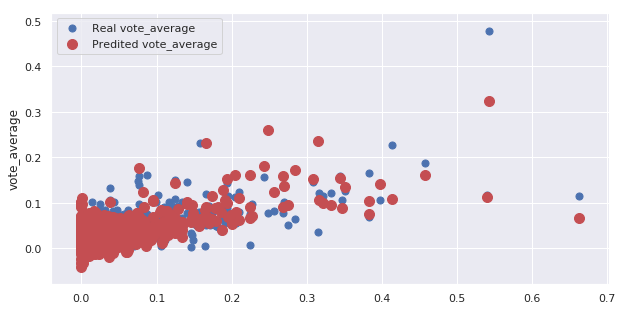

In [9]:
# Train the model using the training sets
svr_rbf.fit(X_train, y_train)
# Make predictions using the testing set
y_pred_svr_rbf = svr_rbf.predict(X_test)

f = plt.figure(figsize=(10,5))
plt.scatter(X_test[:,1], y_test, s=50,label="Real vote_average");
plt.scatter(X_test[:,1], y_pred_svr_rbf,s=100, c='r',label="Predited vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

<h3>Random Forest</h3> 

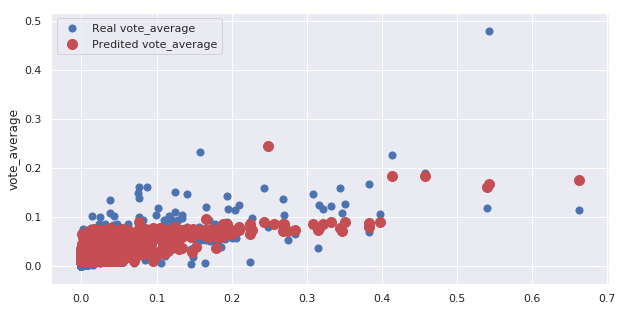

In [10]:
from sklearn.ensemble import RandomForestRegressor
# Create linear regression object
rf = RandomForestRegressor(max_depth=2, random_state=1234, n_estimators=100)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_rf = rf.predict(X_test)

f = plt.figure(figsize=(10,5))
plt.scatter(X_test[:,1], y_test, s=50,label="Real vote_average");
plt.scatter(X_test[:,1], y_pred_rf,s=100, c='r',label="Predited vote_average");
plt.ylabel("vote_average");
plt.legend(loc=2);

In [11]:
scores = cross_val_score(rf, movies_num, target, cv=5, scoring='neg_mean_squared_error')
print(f"MSE: {mean(scores)}")

MSE: -0.0006682889838991262
